# Greedy Algorithm

## Setup

In [1]:
from graphs_2d import *

## Graph Definition

networkx.classes.graph.Graph

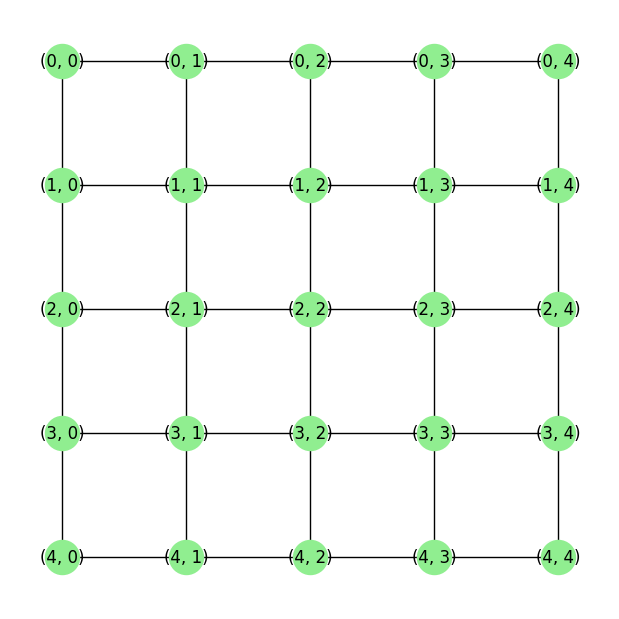

In [2]:
# Generate a single graph
rows, cols = 5, 5
grid_graph = generate_2D_grid_graph(rows, cols)
adjacency_matrix = nx.adjacency_matrix(grid_graph).todense()

plot_graph(grid_graph)

type(grid_graph)

## Starting Node Selection

### Weighted Select

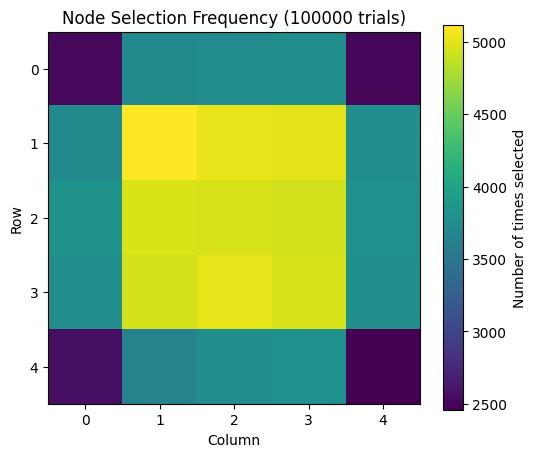

In [3]:
# Run the selection 10000 times
counts = np.zeros(len(grid_graph.nodes()))
for _ in range(100000):
    node = select_starting_node_8way_probablistic(grid_graph)
    node_index = list(grid_graph.nodes()).index(node)
    counts[node_index] += 1

# Reshape counts to match the grid for visualization
counts_matrix = counts.reshape((rows, cols))

plt.figure(figsize=(6, 5))
plt.imshow(counts_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of times selected')
plt.title('Node Selection Frequency (100000 trials)')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

### Equal Select From Highest Neighbors

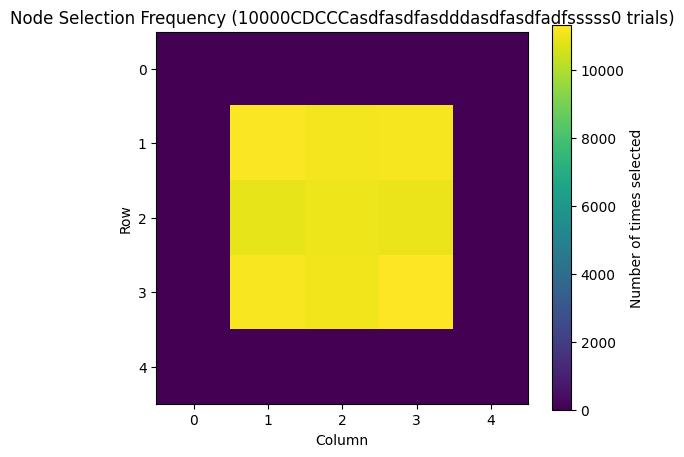

In [4]:
# Run the selection 10000 times
counts = np.zeros(len(grid_graph.nodes()))
for _ in range(100000):
    node = select_starting_node_max_neighbors(grid_graph)
    node_index = list(grid_graph.nodes()).index(node)
    counts[node_index] += 1

# Reshape counts to match the grid for visualization
counts_matrix = counts.reshape((rows, cols))

plt.figure(figsize=(6, 5))
plt.imshow(counts_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of times selected')
plt.title('Node Selection Frequency (10000CDCCCasdfasdfasdddasdfasdfadfsssss0 trials)')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

## Finding MCDS

### Greedy Algorithm Function

In [5]:
def greedy_connected_dominating_set(G, start_node):
    dominating_set = set([start_node])
    dominated = set([start_node])
    dominated.update(adjacent_8(G, start_node))

    # While not all nodes are dominated
    while len(dominated) < G.number_of_nodes():
        # Candidates: nodes adjacent (4-way) to the dominating set, not already in it
        candidates = set()
        for node in dominating_set:
            for neighbor in adjacent_4(G, node):
                if neighbor not in dominating_set:
                    candidates.add(neighbor)
        # For each candidate, count how many new nodes it would dominate
        best_candidate = None
        max_new = -1
        for candidate in candidates:
            new_dominated = set(adjacent_8(G, candidate) + [candidate]) - dominated
            if len(new_dominated) > max_new:
                max_new = len(new_dominated)
                best_candidate = candidate
        # Add the best candidate to the dominating set
        if best_candidate is not None:
            dominating_set.add(best_candidate)
            dominated.update(adjacent_8(G, best_candidate))
            dominated.add(best_candidate)
        else:
            # If no candidate found (should not happen in a connected grid), break
            break
    return dominating_set

### Visualize Greedy Solution

{(0, 1), (1, 2), (2, 1), (3, 1), (1, 1), (2, 3), (3, 3), (1, 3)}


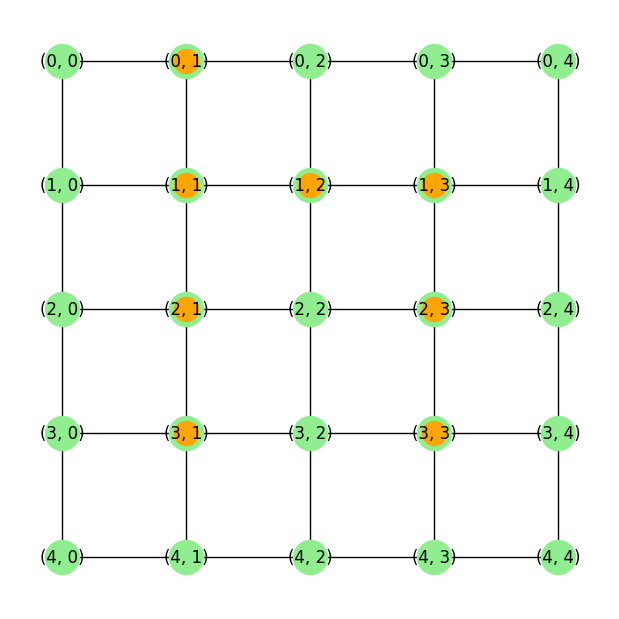

In [6]:
overlay_subset(grid_graph, greedy_connected_dominating_set(grid_graph, select_starting_node_8way_probablistic(grid_graph)))

{(1, 2), (2, 1), (3, 1), (1, 1), (2, 3), (3, 3), (2, 2), (1, 3)}


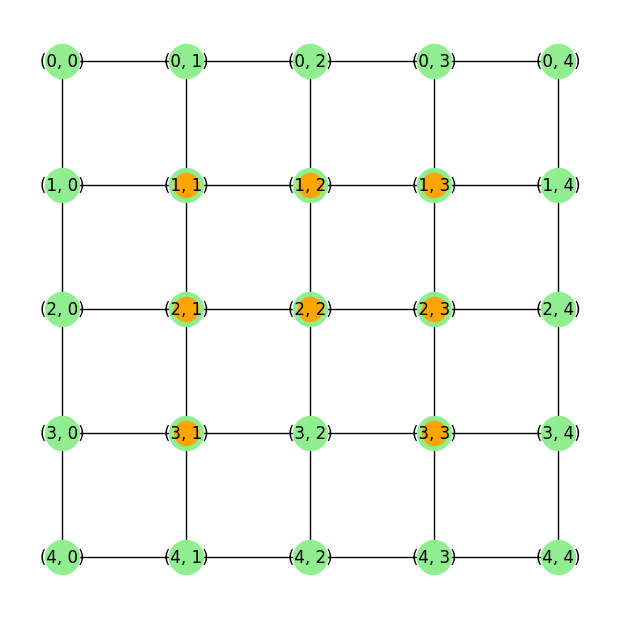

In [7]:
overlay_subset(grid_graph, greedy_connected_dominating_set(grid_graph, select_starting_node_max_neighbors(grid_graph)))

#### Probabilistic Greedy Algorithm Function

In [8]:
def probabilistic_greedy_connected_dominating_set(G, start_node):
    dominating_set = set([start_node])
    dominated = set([start_node])
    dominated.update(adjacent_8(G, start_node))

    while len(dominated) < G.number_of_nodes():
        # Candidates: nodes adjacent (4-way) to the dominating set, not already in it
        candidates = set()
        for node in dominating_set:
            for neighbor in adjacent_4(G, node):
                if neighbor not in dominating_set:
                    candidates.add(neighbor)
        if not candidates:
            break  # Should not happen in a connected grid

        # For each candidate, count how many new nodes it would dominate
        candidate_list = list(candidates)
        new_dominated_counts = []
        for candidate in candidate_list:
            new_dominated = set(adjacent_8(G, candidate) + [candidate]) - dominated
            new_dominated_counts.append(len(new_dominated))

        # If all candidates would dominate 0 new nodes, break
        if sum(new_dominated_counts) == 0:
            break

        # Select a candidate with probability proportional to new_dominated_counts
        selected_candidate = random.choices(candidate_list, weights=new_dominated_counts, k=1)[0]

        dominating_set.add(selected_candidate)
        dominated.update(adjacent_8(G, selected_candidate))
        dominated.add(selected_candidate)

    return dominating_set

#### Visualize Probabilistic Greedy Function

{(0, 1), (3, 1), (0, 3), (2, 3), (0, 2), (3, 3), (3, 2), (1, 3)}


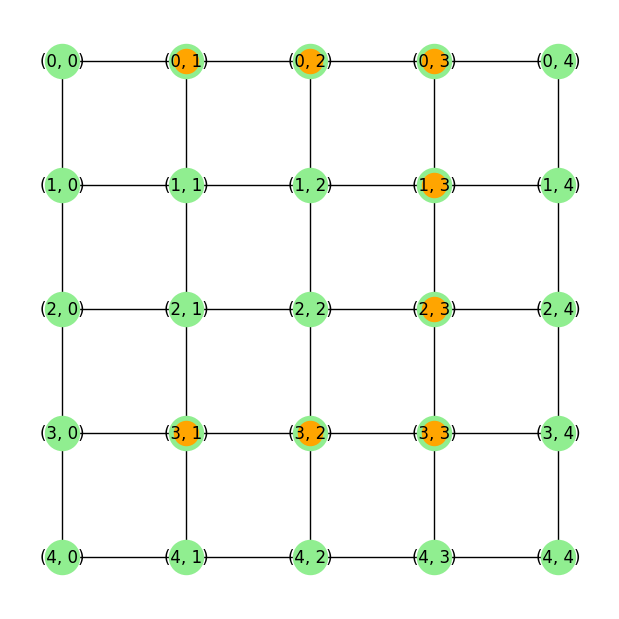

In [9]:
overlay_subset(grid_graph, probabilistic_greedy_connected_dominating_set(grid_graph, select_starting_node_8way_probablistic(grid_graph)))

#### Comparison of Starting Node Selection Methods

In [10]:
# Run many trials to compare average CDS size for both starting node selection methods
num_trials = 1000
sizes_prob = []
sizes_max = []
sizes_fully_prob = []

for _ in range(num_trials):
    # Probabilistic 8-way degree selection
    start_prob = select_starting_node_8way_probablistic(grid_graph)
    cds_prob = greedy_connected_dominating_set(grid_graph, start_prob)
    sizes_prob.append(len(cds_prob))
    
    # Max neighbors selection
    start_max = select_starting_node_max_neighbors(grid_graph)
    cds_max = greedy_connected_dominating_set(grid_graph, start_max)
    sizes_max.append(len(cds_max))

    # Fully probabilistic selection
    start_fully_prob = select_starting_node_8way_probablistic(grid_graph)
    cds_fully_prob = probabilistic_greedy_connected_dominating_set(grid_graph, start_fully_prob)
    sizes_fully_prob.append(len(cds_fully_prob))

avg_prob = np.mean(sizes_prob)
avg_max = np.mean(sizes_max)
avg_fully_prob = np.mean(sizes_fully_prob)

print(f"Average CDS size (8-way probabilistic): {avg_prob:.2f}")
print(f"Average CDS size (max neighbors): {avg_max:.2f}")
print(f"Average CDS size (fully probabilistic): {avg_max:.2f}")

Average CDS size (8-way probabilistic): 7.94
Average CDS size (max neighbors): 7.34
Average CDS size (fully probabilistic): 7.34


In [11]:
grid_graph = generate_2D_grid_graph(10, 10)

# Run many trials to compare average CDS size for both starting node selection methods
num_trials = 1000
sizes_prob = []
sizes_max = []
sizes_fully_prob = []

for _ in range(num_trials):
    # Probabilistic 8-way degree selection
    start_prob = select_starting_node_8way_probablistic(grid_graph)
    cds_prob = greedy_connected_dominating_set(grid_graph, start_prob)
    sizes_prob.append(len(cds_prob))
    
    # Max neighbors selection
    start_max = select_starting_node_max_neighbors(grid_graph)
    cds_max = greedy_connected_dominating_set(grid_graph, start_max)
    sizes_max.append(len(cds_max))

    # Fully probabilistic selection
    start_fully_prob = select_starting_node_8way_probablistic(grid_graph)
    cds_fully_prob = probabilistic_greedy_connected_dominating_set(grid_graph, start_fully_prob)
    sizes_fully_prob.append(len(cds_fully_prob))

avg_prob = np.mean(sizes_prob)
avg_max = np.mean(sizes_max)
avg_fully_prob = np.mean(sizes_fully_prob)

print(f"Average CDS size (8-way probabilistic): {avg_prob:.2f}")
print(f"Average CDS size (max neighbors): {avg_max:.2f}")
print(f"Average CDS size (fully probabilistic): {avg_max:.2f}")

Average CDS size (8-way probabilistic): 33.57
Average CDS size (max neighbors): 33.13
Average CDS size (fully probabilistic): 33.13


In [ ]:
grid_graph = generate_2D_grid_graph(30, 30)

# Run many trials to compare average CDS size for both starting node selection methods
num_trials = 1000
sizes_prob = []
sizes_max = []
sizes_fully_prob = []

for _ in range(num_trials):
    # Probabilistic 8-way degree selection
    start_prob = select_starting_node_8way_probablistic(grid_graph)
    cds_prob = greedy_connected_dominating_set(grid_graph, start_prob)
    sizes_prob.append(len(cds_prob))
    
    # Max neighbors selection
    start_max = select_starting_node_max_neighbors(grid_graph)
    cds_max = greedy_connected_dominating_set(grid_graph, start_max)
    sizes_max.append(len(cds_max))

    # Fully probabilistic selection
    start_fully_prob = select_starting_node_8way_probablistic(grid_graph)
    cds_fully_prob = probabilistic_greedy_connected_dominating_set(grid_graph, start_fully_prob)
    sizes_fully_prob.append(len(cds_fully_prob))

avg_prob = np.mean(sizes_prob)
avg_max = np.mean(sizes_max)
avg_fully_prob = np.mean(sizes_fully_prob)

print(f"Average CDS size (8-way probabilistic): {avg_prob:.2f}")
print(f"Average CDS size (max neighbors): {avg_max:.2f}")
print(f"Average CDS size (fully probabilistic): {avg_max:.2f}")